In [1]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import api_key

In [2]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [3]:
# Get latitude and temperature for cities
cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taiwan"]

# set up lists to hold reponse info
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

The latitude information received is: [48.86, 51.51, 59.91, 39.91, 19.01, 14.59, 40.73, 47.6, 32.78, 24]
The temperature information received is: [16.36, 14.27, 7.08, 19.49, 28, 25.18, 21.26, 18.9, 33.17, 26.67]


In [4]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,temp
0,Paris,48.86,16.36
1,London,51.51,14.27
2,Oslo,59.91,7.08
3,Beijing,39.91,19.49
4,Mumbai,19.01,28.00
5,Manila,14.59,25.18
6,New York,40.73,21.26
7,Seattle,47.60,18.90
8,Dallas,32.78,33.17
9,Taiwan,24.00,26.67


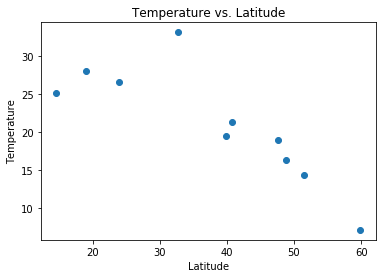

In [13]:
# Create a Scatter Plot for Temperature vs. Latitude
x_values = weather_data['lat']
y_values = weather_data['temp']
plt.scatter(x=weather_data["lat"],y=weather_data["temp"])
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Temperature vs. Latitude")
plt.show()

In [12]:
# Perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weather_data["lat"], weather_data["temp"])

#Get regression values
regress_values = weather_data["lat"] * slope + intercept
print(regress_values)

0    16.453705
1    15.346286
2    11.835978
3    20.193854
4    28.927836
5    30.774927
6    19.851181
7    16.980251
8    23.173438
9    26.842546
Name: lat, dtype: float64


In [20]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.42x +36.87


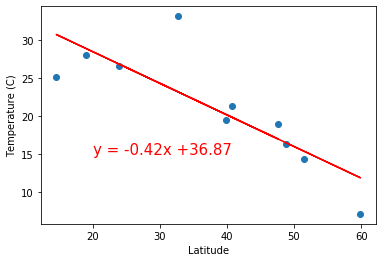

In [32]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.show()

In [33]:
# Use the line equation to predict the temperature for Florence at a latitude of 34.8
florence_lat = 34.8
florence_predicted_temp = round(slope * florence_lat + intercept,2)
                                
print(f"The Predicted temperature for Florence will be {florence_predicted_temp}.")

The Predicted temperature for Florence will be 22.33.


In [34]:
# Use API to determine actual temperature
response = requests.get(query_url + "Florence").json()
florence_actual_temp = response['main']['temp']

print(f"The actual temperature of Florence is {florence_actual_temp}")

The actual temperature of Florence is 25.47
